In [1]:
import pandas as pd 
from clear_txt import *
from data_path import *

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ademoguzhanozdemir/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df=migros_raw_products

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15387 entries, 35 to 3332
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   uMarka                 15387 non-null  object 
 1   urunKategorileri       15387 non-null  object 
 2   urunKategorileriTwo    15385 non-null  object 
 3   urunKategorileriThree  14945 non-null  object 
 4   urunKategorileriFour   8745 non-null   object 
 5   urunKategorileriFive   7 non-null      object 
 6   urunKategorileriSix    0 non-null      float64
 7   urunKategorileriSeven  0 non-null      float64
 8   urunAdi                15385 non-null  object 
 9   urunAciklama           12935 non-null  object 
 10  urunFoto               15387 non-null  object 
 11  urunURL                15385 non-null  object 
 12  Unnamed: 8             0 non-null      float64
dtypes: float64(3), object(10)
memory usage: 1.6+ MB


## Null Marka ve Ürün Adlarını Temizledim


In [4]:
df = df.dropna(subset=['uMarka'])
df = df.dropna(subset=['urunAdi'])

In [5]:
df.isnull().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15385 entries, 35 to 3332
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   uMarka                 15385 non-null  bool 
 1   urunKategorileri       15385 non-null  bool 
 2   urunKategorileriTwo    15385 non-null  bool 
 3   urunKategorileriThree  15385 non-null  bool 
 4   urunKategorileriFour   15385 non-null  bool 
 5   urunKategorileriFive   15385 non-null  bool 
 6   urunKategorileriSix    15385 non-null  bool 
 7   urunKategorileriSeven  15385 non-null  bool 
 8   urunAdi                15385 non-null  bool 
 9   urunAciklama           15385 non-null  bool 
 10  urunFoto               15385 non-null  bool 
 11  urunURL                15385 non-null  bool 
 12  Unnamed: 8             15385 non-null  bool 
dtypes: bool(13)
memory usage: 315.5 KB


## Unnamed Kolonunu Sildim

In [6]:
del df['Unnamed: 8']

### Unique Kategorilere Bakalım

In [7]:
df.nunique()

uMarka                    1394
urunKategorileri            14
urunKategorileriTwo         88
urunKategorileriThree      421
urunKategorileriFour       563
urunKategorileriFive         3
urunKategorileriSix          0
urunKategorileriSeven        0
urunAdi                  15209
urunAciklama             12153
urunFoto                 15077
urunURL                  15219
dtype: int64

#### 10 Ana Kategori Olması Gerekirken 14 Gözüküyor. Temizleyelim  

In [8]:
def unique(list1):
    # intilize a null list
    unique_list = []
     
    # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
    # print list
    for x in unique_list:
        print (x)

In [9]:
unique(df["urunKategorileri"])


Gıda, Şekerleme
Et, Tavuk, Balık
Kağıt, Kozmetik
Ev, Pet
Süt, Kahvaltılık
İçecek
Deterjan, Temizlik
Bebek, Oyuncak
Meyve, Sebze
Shoulders
Elektronik
Guy
Bugün Eklenenler
Oreal


In [10]:
df[df["urunKategorileri"]=='Elektronik']

,uMarka,urunKategorileri,urunKategorileriTwo,urunKategorileriThree,urunKategorileriFour,urunKategorileriFive,urunKategorileriSix,urunKategorileriSeven,urunAdi,urunAciklama,urunFoto,urunURL
4127,Urban Mood,Elektronik,"Aydınlatma, Elektrik Malzemeleri",Masa Lambaları,NaN,NaN,NaN,NaN,Urban Mood Dekoratif Led Işık Kavanoz 10'lu - ...,NaN,https://migros-dali-storage-prod.global.ssl.fa...,https://www.migros.com.tr/urban-mood-dekoratif...
115,i'think,Elektronik,Görüntü Ve Ses Sistemleri,"HDMI, Scart Kablo",NaN,NaN,NaN,NaN,i'think Hdmi To Type-C Görüntü Ses Aktarım Kab...,NaN,https://migros-dali-storage-prod.global.ssl.fa...,https://www.migros.com.tr/ithink-hdmi-to-type-...
4196,Lg,Elektronik,Görüntü Ve Ses Sistemleri,Televizyon,NaN,NaN,NaN,NaN,Lg 50Nano796 127 Ekran Uhd Nanocell Uydu Smart...,NaN,https://migros-dali-storage-prod.global.ssl.fa...,https://www.migros.com.tr/lg-50nano796-127-ekr...
112,i'think,Elektronik,Telefon Ve Aksesuarları,Telefon Aksesuarları,NaN,NaN,NaN,NaN,i'think Çift Usb Girişli 2.1A Araç İçi Şarj Ci...,NaN,https://migros-dali-storage-prod.global.ssl.fa...,https://www.migros.com.tr/ithink-cift-usb-giri...
108,i'think,Elektronik,Telefon Ve Aksesuarları,Telefon Aksesuarları,NaN,NaN,NaN,NaN,i'think Araç İçi Telefon Tutucu Ve Kablosuz Şa...,NaN,https://migros-dali-storage-prod.global.ssl.fa...,https://www.migros.com.tr/ithink-arac-ici-tele...
14,i'think,Elektronik,Telefon Ve Aksesuarları,Telefon Aksesuarları,NaN,NaN,NaN,NaN,i'think Type-C Şarj & Data Kablo 1 Metre - Migros,"&lt;p&gt;&lt;span style="";color: rgb(117, 117,...",https://migros-dali-storage-prod.global.ssl.fa...,https://www.migros.com.tr/ithink-type-c-sarj-d...
4058,Electrolux,Elektronik,Elektrikli Ev Aletleri,Süpürge,NaN,NaN,NaN,NaN,Electrolux Eufc81db Elektrikli Süpürge - Migros,NaN,https://migros-dali-storage-prod.global.ssl.fa...,https://www.migros.com.tr/electrolux-eufc81db-...
4197,Toshiba,Elektronik,Görüntü Ve Ses Sistemleri,Televizyon,NaN,NaN,NaN,NaN,Toshiba 32Ll3b63dt 80 Ekran Fhd Smart Led Tv -...,NaN,https://migros-dali-storage-prod.global.ssl.fa...,https://www.migros.com.tr/toshiba-32ll3b63dt-8...
4131,Urban Mood,Elektronik,"Aydınlatma, Elektrik Malzemeleri",Masa Lambaları,NaN,NaN,NaN,NaN,Urban Mood 16 Dekoratif Led Top Işık Zinciri -...,NaN,https://migros-dali-storage-prod.global.ssl.fa...,https://www.migros.com.tr/urban-mood-16-dekora...
4176,Joysidea,Elektronik,"Isıtma, Soğutma",Isıtıcılar,NaN,NaN,NaN,NaN,Joysidea Quartz 1400W Elektrikli Isıtıcı - Migros,&lt;p&gt;1400W&lt;/p&gt;&lt;p&gt;Enerji tasarr...,https://migros-dali-storage-prod.global.ssl.fa...,https://www.migros.com.tr/joysidea-quartz-1400...


### Yanlış Eklenen Kategori Az Olduğu İçin Sildim

In [11]:
df.drop(df[df["urunKategorileri"]=='Oreal'].index, inplace = True) 
df.drop(df[df["urunKategorileri"]=='Guy'].index, inplace = True) 
df.drop(df[df["urunKategorileri"]=='Shoulders'].index, inplace = True) 
df.drop(df[df["urunKategorileri"]=='Bugün Eklenenler'].index, inplace = True) 

In [12]:
df.nunique()

uMarka                    1388
urunKategorileri            10
urunKategorileriTwo         87
urunKategorileriThree      420
urunKategorileriFour       558
urunKategorileriFive         1
urunKategorileriSix          0
urunKategorileriSeven        0
urunAdi                  15065
urunAciklama             12033
urunFoto                 14933
urunURL                  15075
dtype: int64

In [13]:
df["uMarka"]=df["uMarka"].str.capitalize()

In [14]:
df.describe(include=['O'])

,uMarka,urunKategorileri,urunKategorileriTwo,urunKategorileriThree,urunKategorileriFour,urunKategorileriFive,urunAdi,urunAciklama,urunFoto,urunURL
count,15235,15235,15235,14795,8628,4,15235,12804,15235,15233
unique,1387,10,87,420,558,1,15065,12033,14933,15075
top,Reyondan,"Kağıt, Kozmetik",Atıştırmalık,Deodorant,Ruj,M&M's,Le Petit Marseillais Duş Jeli Akdeniz Çileği 6...,"&lt;p&gt;&lt;strong&gt;Bir müşteri, aynı gün i...",https://migros-dali-storage-prod.global.ssl.fa...,https://www.migros.com.tr/elidor-gun-boyu-haci...
freq,479,3742,1343,254,205,4,2,98,145,2


### Birebir Aynı Olan Satırları Sildim

In [15]:
df.drop_duplicates(keep = False, inplace = True)

In [16]:
df.describe(include=['O'])

,uMarka,urunKategorileri,urunKategorileriTwo,urunKategorileriThree,urunKategorileriFour,urunKategorileriFive,urunAdi,urunAciklama,urunFoto,urunURL
count,14919,14919,14919,14479,8506,4,14919,12616,14919,14917
unique,1384,10,87,420,558,1,14907,11951,14775,14917
top,Reyondan,"Kağıt, Kozmetik",Atıştırmalık,Deodorant,Ruj,M&M's,Bin Dokuzyüz Seksen Dört George Orwell - Migros,"&lt;p&gt;&lt;strong&gt;Bir müşteri, aynı gün i...",https://migros-dali-storage-prod.global.ssl.fa...,https://www.migros.com.tr/nivea-micellair-expe...
freq,479,3426,1343,254,189,4,2,98,145,1


### En Çok Ürün Hangi Kategoride Bakalım

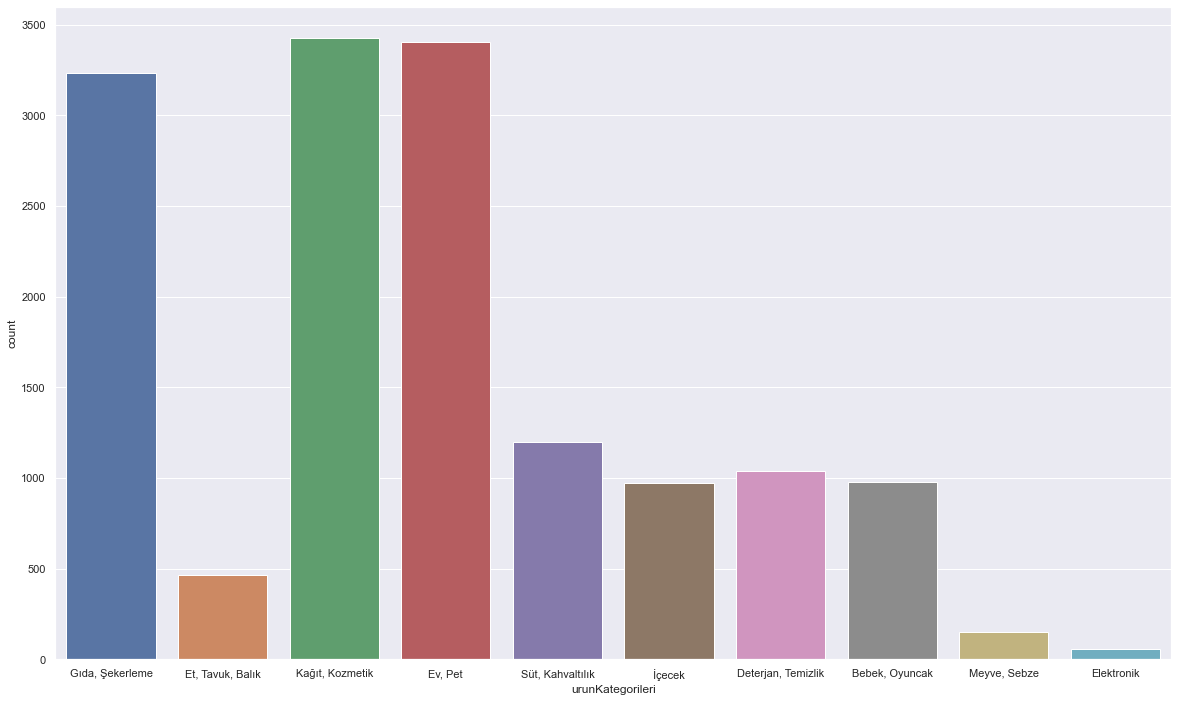

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
plt.figure(figsize=(20, 12))

ax = sns.countplot(x="urunKategorileri", data=df)

In [18]:
kagitKozmetik=df[df["urunKategorileri"] == "Kağıt, Kozmetik"]

### Top 10 Kağıt Kozmetik Markaları

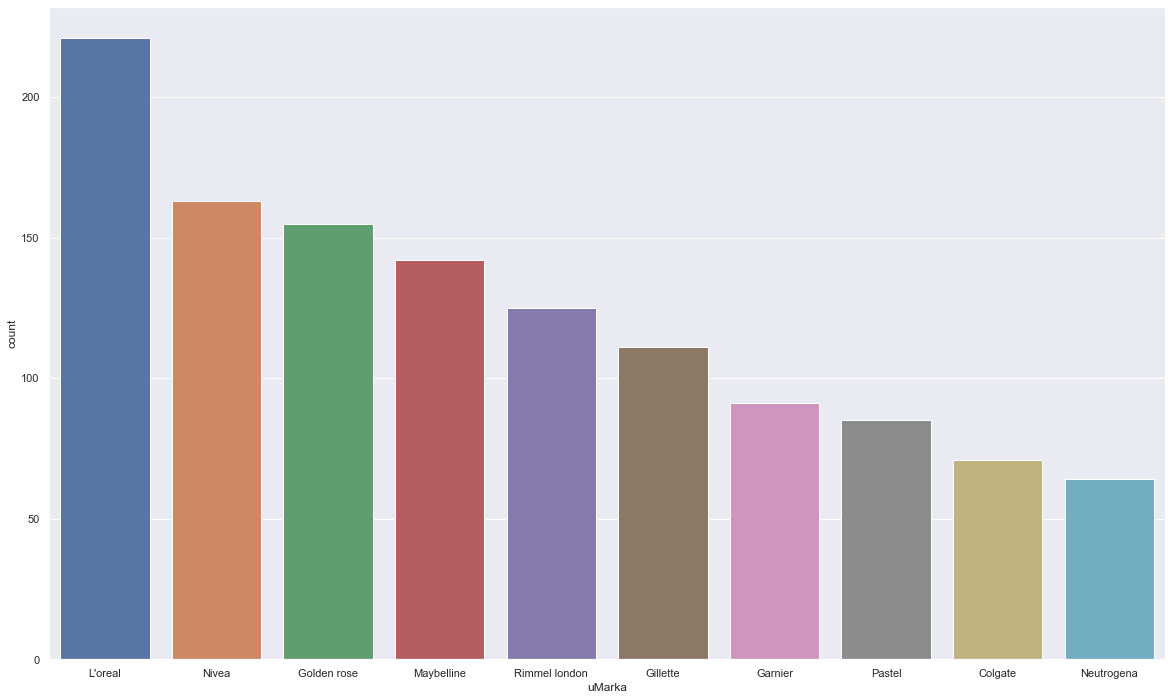

In [19]:
sns.set()
plt.figure(figsize=(20, 12))
sns.countplot(x='uMarka',data=kagitKozmetik,order=pd.value_counts(kagitKozmetik['uMarka']).iloc[:10].index)


### Aynı İsme Sahip Olan Ürünleri Listeleyelim

In [20]:
pd.value_counts(kagitKozmetik['urunAdi']).iloc[:3]

Elseve Arginine Direnç X3 Dökülme Karşıtı Şampuan 450 Ml - Migros    2
Oral-B Kids Diş Fırçası 3-5 Yaş - Migros                             1
Signal Exclusive Seyahat Seti - Migros                               1
Name: urunAdi, dtype: int64

In [21]:
# 1 Tane çıktı. İsimleri aynı açıklamaları farklı.

In [22]:
kagitKozmetik[kagitKozmetik.urunAdi == "Elseve Arginine Direnç X3 Dökülme Karşıtı Şampuan 450 Ml - Migros"]

,uMarka,urunKategorileri,urunKategorileriTwo,urunKategorileriThree,urunKategorileriFour,urunKategorileriFive,urunKategorileriSix,urunKategorileriSeven,urunAdi,urunAciklama,urunFoto,urunURL
104,L'oreal,"Kağıt, Kozmetik",Saç Bakım,Şampuan,NaN,NaN,NaN,NaN,Elseve Arginine Direnç X3 Dökülme Karşıtı Şamp...,&lt;p&gt;Saçın Yeniden Yapılandırılmasında Rol...,https://migros-dali-storage-prod.global.ssl.fa...,https://www.migros.com.tr/elseve-arginine-dire...
103,L'oreal,"Kağıt, Kozmetik",Saç Bakım,Şampuan,NaN,NaN,NaN,NaN,Elseve Arginine Direnç X3 Dökülme Karşıtı Şamp...,&lt;p&gt;Elseve Arginine Direnç X3 Dökülme Kar...,https://migros-dali-storage-prod.global.ssl.fa...,https://www.migros.com.tr/elseve-arginine-dire...


In [23]:
sutKahvalti=df[df["urunKategorileri"] == "Süt, Kahvaltılık"]

In [24]:
yumurta=sutKahvalti[sutKahvalti["urunKategorileriTwo"]=="Yumurta"]

In [25]:
yumurta.describe(include=['O'])

,uMarka,urunKategorileri,urunKategorileriTwo,urunKategorileriThree,urunKategorileriFour,urunKategorileriFive,urunAdi,urunAciklama,urunFoto,urunURL
count,24,24,24,0,0,0,24,24,24,24
unique,12,1,1,0,0,0,24,24,24,24
top,Yumurtacım,"Süt, Kahvaltılık",Yumurta,NaN,NaN,NaN,M Life Organik 10'lu M - Orta Boy Yumurta (53-...,"&lt;p&gt;Geniş gezinti alanına sahip, korunakl...",https://migros-dali-storage-prod.global.ssl.fa...,https://www.migros.com.tr/flotty-sports-organi...
freq,7,24,24,NaN,NaN,NaN,1,1,1,1


In [26]:
yumurta.head(24)

,uMarka,urunKategorileri,urunKategorileriTwo,urunKategorileriThree,urunKategorileriFour,urunKategorileriFive,urunKategorileriSix,urunKategorileriSeven,urunAdi,urunAciklama,urunFoto,urunURL
1135,Flotty,"Süt, Kahvaltılık",Yumurta,NaN,NaN,NaN,NaN,NaN,Flotty Organik 10'lu M Orta Boy Yumurta (53-62...,&lt;p&gt;&lt;strong&gt;İşletme Kayıt No&lt;/st...,https://migros-dali-storage-prod.global.ssl.fa...,https://www.migros.com.tr/flotty-organik-10lu-...
1127,Yumurtacım,"Süt, Kahvaltılık",Yumurta,NaN,NaN,NaN,NaN,NaN,Yumurtacım 30'lu L Boy Yumurta (63-72 G) - Migros,&lt;p&gt;&lt;strong&gt;Yumurtacım 30';lu L Boy...,https://migros-dali-storage-prod.global.ssl.fa...,https://www.migros.com.tr/yumurtacim-30lu-l-bo...
1138,Nova,"Süt, Kahvaltılık",Yumurta,NaN,NaN,NaN,NaN,NaN,Nova Yumurta Zarı Tozu Kapsülü 19.5 G - Migros,&lt;p&gt;&lt;strong&gt;İşletme Kayıt No&lt;/st...,https://migros-dali-storage-prod.global.ssl.fa...,https://www.migros.com.tr/nova-yumurta-zari-to...
1128,Yumurtacım,"Süt, Kahvaltılık",Yumurta,NaN,NaN,NaN,NaN,NaN,Yumurtacım Cage Free 10'Lu M Boy Yumurta (53-6...,&lt;p&gt;&lt;strong&gt;Yumurtacım Cage Free 10...,https://migros-dali-storage-prod.global.ssl.fa...,https://www.migros.com.tr/yumurtacim-cage-free...
4808,Keskinoğlu,"Süt, Kahvaltılık",Yumurta,NaN,NaN,NaN,NaN,NaN,Keskinoğlu Free Range M 10'lu Yumurta - Migros,"&lt;p&gt;Geniş gezinti alanına sahip, korunakl...",https://migros-dali-storage-prod.global.ssl.fa...,https://www.migros.com.tr/keskinoglu-free-rang...
1121,Kor,"Süt, Kahvaltılık",Yumurta,NaN,NaN,NaN,NaN,NaN,Kor Organik 10'lu M Orta Boy Yumurta ( 53-62 G...,&lt;p&gt;&lt;strong&gt;Kor Organik 10';lu M Or...,https://migros-dali-storage-prod.global.ssl.fa...,https://www.migros.com.tr/kor-organik-10lu-m-o...
1122,Flotty,"Süt, Kahvaltılık",Yumurta,NaN,NaN,NaN,NaN,NaN,Flotty Loves Organik Yumurta 6'Lı M Boy (53-6...,&lt;b&gt;Flotty Loves Organik Yumurta 6';lı M ...,https://migros-dali-storage-prod.global.ssl.fa...,https://www.migros.com.tr/flotty-loves-organik...
1119,Güres,"Süt, Kahvaltılık",Yumurta,NaN,NaN,NaN,NaN,NaN,Güres Bıldırcın Yumurta 12'li - Migros,&lt;p&gt;&lt;strong&gt;Güres Bıldırcın Yumurta...,https://migros-dali-storage-prod.global.ssl.fa...,https://www.migros.com.tr/gures-bildircin-yumu...
1126,Yumurtacım,"Süt, Kahvaltılık",Yumurta,NaN,NaN,NaN,NaN,NaN,Yumurtacım 15'li L Boy Yumurta (63-72 G) - Migros,&lt;p&gt;&lt;strong&gt;Yumurtacım 15';li L Boy...,https://migros-dali-storage-prod.global.ssl.fa...,https://www.migros.com.tr/yumurtacim-15li-l-bo...
1134,Yumurtacım,"Süt, Kahvaltılık",Yumurta,NaN,NaN,NaN,NaN,NaN,Yumurtacım 10'lu L Boy Kahverengi Yumurta (63-...,&lt;p&gt;Yerli Üretim&lt;/p&gt;&lt;p&gt;10';lu...,https://migros-dali-storage-prod.global.ssl.fa...,https://www.migros.com.tr/yumurtacim-10lu-l-bo...


In [27]:
from to_chart import *

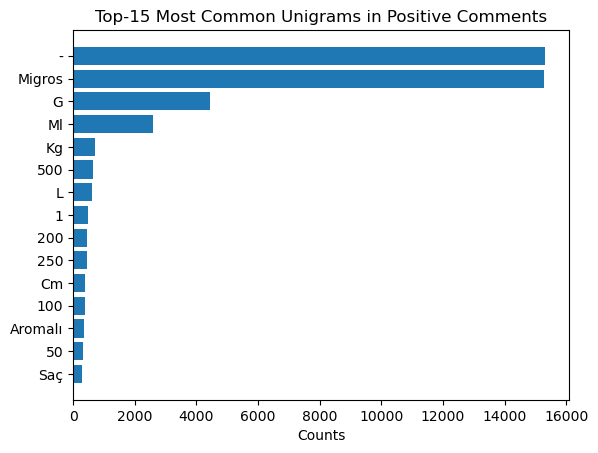

In [28]:
most_15_words(df["urunAdi"])